In [20]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [22]:
df=pd.read_csv("C:/Users/dhanu/Downloads/Groceries_dataset.csv")
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [23]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [24]:
df.tail()

,Member_number,Date,itemDescription
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice
38764,1521,26-12-2014,cat food


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [26]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [27]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
38760    False
38761    False
38762    False
38763    False
38764    False
Length: 38765, dtype: bool

In [28]:
df.columns

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

In [29]:
transactions = df.groupby(["Member_number", "Date"])['itemDescription'].apply(list).tolist()
transactions

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk'

In [33]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
te_ary

array([[False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [34]:
df_encoded

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
min_support = 0.01  
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)
print(frequent_itemsets.sort_values(by='support', ascending=False).head(10))

     support            itemsets
62  0.157923        (whole milk)
40  0.122101  (other vegetables)
46  0.110005        (rolls/buns)
52  0.097106              (soda)
63  0.085879            (yogurt)
47  0.069572   (root vegetables)
57  0.067767    (tropical fruit)
5   0.060683     (bottled water)
49  0.060349           (sausage)
15  0.053131      (citrus fruit)


In [38]:
frequent_itemsets

,support,itemsets
0,0.021386,(UHT-milk)
1,0.033950,(beef)
2,0.021787,(berries)
3,0.016574,(beverages)
4,0.045312,(bottled beer)
...,...,...
64,0.010559,"(rolls/buns, other vegetables)"
65,0.014837,"(other vegetables, whole milk)"
66,0.013968,"(rolls/buns, whole milk)"
67,0.011629,"(whole milk, soda)"


In [39]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print("\nAssociation Rules:")
print(rules.sort_values(by='lift', ascending=False).head(10))


Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


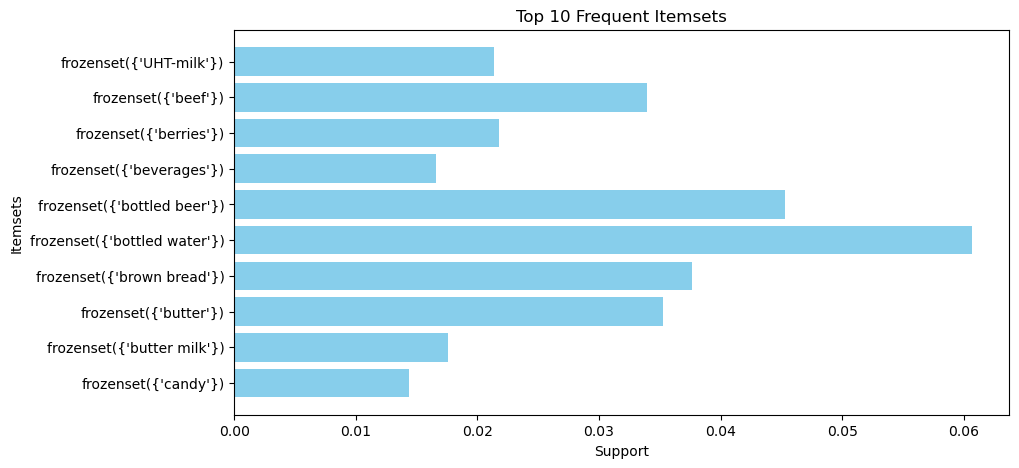

In [40]:
plt.figure(figsize=(10, 5))
plt.barh(frequent_itemsets['itemsets'].astype(str).head(10), frequent_itemsets['support'].head(10), color='skyblue')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Top 10 Frequent Itemsets')
plt.gca().invert_yaxis()
plt.show()

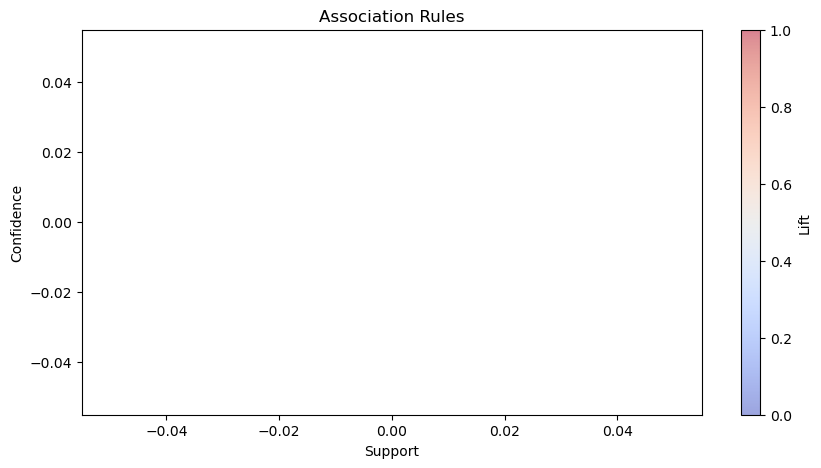

In [41]:
plt.figure(figsize=(10, 5))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5, c=rules['lift'], cmap='coolwarm')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar(label='Lift')
plt.title('Association Rules')
plt.show()

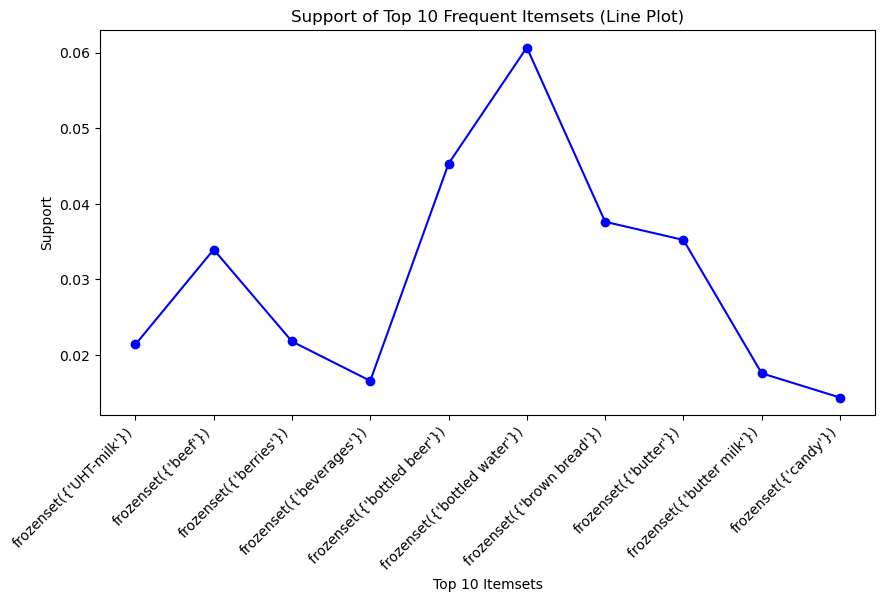

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(frequent_itemsets['support'].head(10), marker='o', linestyle='-', color='b')
plt.xlabel('Top 10 Itemsets')
plt.ylabel('Support')
plt.title('Support of Top 10 Frequent Itemsets (Line Plot)')
plt.xticks(range(10), frequent_itemsets['itemsets'].astype(str).head(10), rotation=45, ha='right')
plt.show()

In [46]:

if not rules.empty:
    plt.figure(figsize=(10, 5))
    rules_subset = rules.pivot(index='antecedents', columns='consequents', values='lift').fillna(0)
    if not rules_subset.empty:
        sns.heatmap(rules_subset, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Heatmap of Lift Values in Association Rules')
        plt.xlabel('Consequents')
        plt.ylabel('Antecedents')
        plt.xticks(rotation=90)
        plt.yticks(rotation=0)
        plt.show()
    else:
        print("No valid lift values to plot in heatmap.")
else:
    print("No association rules generated.")


No association rules generated.
